## 整理策略選股的獲利、虧損資訊

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 定義資料夾路徑
folder_path = r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\ETF test\stock choose all\stock choose for all template (Monthstratgy_123M)(fixed)'  # 替換成實際的資料夾路徑

# 讀取資料夾中的所有xlsx檔案
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# 建立空的DataFrame來存放所有檔案的資料
all_data1 = pd.DataFrame()

# 讀取每個檔案並合併到all_data中
for file in file_list:
    file_path = os.path.join(folder_path, file)
    data = pd.read_excel(file_path)
    initial_day = file.split('all')[0]
    data['initial day'] = initial_day
    all_data1 = pd.concat([all_data1, data], ignore_index=True)
all_df = all_data1
all_data1.head(10)

,ID,產業別,T5,T6,T11,TM,S250rate,S50rate,S20rate,ES250rate,...,T11 M31_2M profit,T11 M21_3M profit,T11 M31_3M profit,TM M11_1M profit,TM M21_1M profit,TM M21_2M profit,TM M31_2M profit,TM M21_3M profit,TM M31_3M profit,initial day
0,2455,通信網路業,False,True,False,False,98.7,76.3,93.7,97.2,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
1,5531,建材營造業,False,False,False,True,93.5,23.0,38.6,64.6,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
2,3025,通信網路業,False,True,False,False,86.4,92.3,95.9,92.3,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
3,3043,其他電子業,False,False,False,True,81.4,61.5,85.6,55.1,...,0.000,0.000,0.000,-0.058,-0.04,-0.071,0.0,-0.071,0.0,2009-11-24
4,2390,其他電子業,False,True,False,False,43.6,87.2,92.2,81.8,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
5,2493,電子零組件業,False,True,True,False,84.4,94.0,93.0,90.3,...,0.303,0.319,-0.064,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
6,1525,汽車工業,False,True,False,False,96.2,99.7,99.7,99.3,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
7,2360,其他電子業,False,False,True,False,87.8,94.5,55.4,92.0,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
8,1809,玻璃陶瓷,False,True,True,False,85.0,87.5,64.5,93.0,...,-0.104,-0.081,-0.104,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24
9,3029,資訊服務業,False,True,False,False,83.8,97.9,95.3,96.2,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.000,0.0,2009-11-24


In [4]:
all_df.loc[all_df['T11']].describe()

,ID,S250rate,S50rate,S20rate,ES250rate,ES50rate,ES20rate,ATR250/price,ATR50/price,ATR20/price,...,T11 M21_2M profit,T11 M31_2M profit,T11 M21_3M profit,T11 M31_3M profit,TM M11_1M profit,TM M21_1M profit,TM M21_2M profit,TM M31_2M profit,TM M21_3M profit,TM M31_3M profit
count,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,...,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.00000,22475.000000,22475.000000,22475.000000
mean,4105.168899,81.571835,76.871835,73.020623,87.155355,84.463804,86.506176,0.301911,0.327195,0.338957,...,0.010750,0.010628,0.009097,0.009404,0.002495,0.003294,0.00303,0.002519,0.002157,0.001734
std,2152.128578,14.433862,21.694462,25.284760,6.879972,14.369987,14.295224,0.276290,0.303178,0.313599,...,0.101324,0.097978,0.116645,0.107662,0.040861,0.047986,0.05518,0.051964,0.057484,0.054576
min,1101.000000,0.200000,0.000000,0.000000,75.000000,5.300000,5.700000,-1.209266,-1.642158,-1.669773,...,-0.453000,-0.456000,-0.453000,-0.456000,-0.142000,-0.150000,-0.45300,-0.456000,-0.453000,-0.456000
25%,2409.000000,74.800000,69.300000,60.300000,81.300000,79.400000,82.500000,0.098867,0.104344,0.109118,...,-0.061000,-0.060000,-0.064000,-0.063000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3413.000000,84.700000,84.500000,82.900000,87.200000,89.000000,91.400000,0.216200,0.233861,0.243000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,6016.000000,92.300000,92.300000,92.300000,93.000000,94.600000,96.100000,0.426359,0.459279,0.475300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,9927.000000,100.000000,100.000000,99.800000,100.000000,100.000000,99.000000,2.988589,2.882467,2.900717,...,3.077000,1.881000,6.845000,2.549000,0.747000,0.982000,2.10300,1.782000,2.118000,2.314000


In [7]:
import numpy as np
profit_threshold = 20
templates = ['T5', 'T6', 'T11']
strategys = ['M21_1M', 'M21_2M', 'M21_3M ', 'M11_1M', 'M31_2M ', 'M31_3M ']
for template in templates:
    for strategy in strategys:
        all_data = all_df.loc[all_df[template]]
        template_num = all_data.loc[:,['T5', 'T6', 'T11', 'TM']].sum(axis=1)
        # P = all_data.loc[:, ['T5 1W profit','T6 1W profit','T11 1W profit','TM 1W profit']].sum(axis=1)*100
        P = all_data.loc[:, [f'T5 {strategy} profit',f'T6 {strategy} profit',f'T11 {strategy} profit',f'TM {strategy} profit']].sum(axis=1)*100
        profit = P/template_num
        all_data['profit'] = profit
        X = all_data.loc[all_data['profit']>profit_threshold, ['ID', 'initial day', 'profit', 'buy price', 'ATR20/price', 'S250rate', 'S50rate', 'S20rate', 'ES250rate', 'ES50rate', 'ES20rate', 'T5', 'T6', 'T11']]
        X.set_index('ID', inplace=True)
        save_path = f'C:/Users/User/Desktop/code/python/stockdata_VCP/VCP_predict_project/ETF test/獲利股票時間、個股資訊month strategy (fixed)/{template}-{strategy}獲利超過{profit_threshold}%股票資訊.xlsx'
        X.to_excel(save_path)

C:\Users\User\AppData\Local\Temp\ipykernel_11588\2473736011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['profit'] = profit
C:\Users\User\AppData\Local\Temp\ipykernel_11588\2473736011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['profit'] = profit
C:\Users\User\AppData\Local\Temp\ipykernel_11588\2473736011.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

## 獲利分布圖

In [ ]:
import os
import pandas as pd
from scipy.integrate import trapz
import numpy

# 指定要读取的文件夹路径
folder_path = "C:/Users/User/Desktop/code/python/stockdata_VCP/VCP_predict_project/ETF test/停利損閥值比較S579"

# 获取文件夹中的所有文件
file_list = os.listdir(folder_path)

# 用于存储读取的 Excel 数据的列表
excel_data = []
column = []
# 循环遍历文件夹中的所有文件
for file_name in file_list:
    if file_name.endswith(".xlsx") or file_name.endswith(".xls"):  # 仅处理 Excel 文件
        file_path = os.path.join(folder_path, file_name)
        column.append(file_path.split('\\')[1].split('.')[0])
        # 使用 pandas 读取 Excel 文件
        excel_df = pd.read_excel(file_path).iloc[:,-2]
        excel_data.append(excel_df)

# 将所有 Excel 数据合并成一个 DataFrame
combined_df = pd.concat(excel_data, ignore_index=True, axis=1)

combined_df.columns = column
display(combined_df)

# 打印合并后的 DataFrame
plt.rcParams['axes.facecolor'] = '#F5F5F5'  # 将背景色设为浅灰色
plt.rcParams['figure.facecolor'] = '#F5F5F5'  # 将图形的背景色设为浅灰色
for i in range(3):
    t = i
    p = combined_df.iloc[:,[t,t+3,t+6]]
    for col in p.columns:
        p[col] = p[col].diff(-1).shift(1)
    p.fillna(0, inplace=True)
    p.drop(0, axis=0, inplace=True)
    area = []
    for j in range(3):
        y2 = np.zeros(len(p.iloc[:,j].values))
        area.append(trapz(np.maximum(p.iloc[:,j].values, y2) - np.minimum(p.iloc[:,j].values, y2), np.arange(0,len(p.iloc[:,j].values),1)))

    plt.figure(figsize = (20,15))
    title = p.columns[0].split(' ')[1]
    plt.title(title, fontsize = 40)
    plt.plot(p.iloc[:,0])
    plt.plot(p.iloc[:,1])
    plt.plot(p.iloc[:,2])
    plt.yticks(np.arange(0, 10, 0.5), np.arange(0,10,0.5), fontsize = 20)
    plt.ylabel('% in trade times', fontsize = 30)
    plt.xlabel('Profit(%)', fontsize = 30)
    plt.xticks(np.arange(0, len(p.index.values)+2, 2), np.arange(0,52,2), fontsize = 20)
    plt.legend(p.columns, prop={'size': 20})
    plt.grid()
    ax = plt.gca()

    # 在图表中心上方绘制表格
    table_data = [['', 'area under line'],
                [str(p.columns[0]), str(area[0])],
                [str(p.columns[1]), str(area[1])],
                [str(p.columns[2]), str(area[2])],]

    table = plt.table(cellText=table_data, cellLoc='center', loc=8)
    table.auto_set_font_size(False)
    table.set_fontsize(15)
    table.scale(0.51, 1.5)
    plt.savefig(folder_path + '/' + title+ '1M.png')
    plt.show()
# for i in range(4):
#     t = i
#     p = combined_df.iloc[:,[0+t*4,1+t*4,2+t*4,3+t*4]]
#     for col in p.columns:
#         p[col] = p[col].diff(-1).shift(1)
#     p.fillna(0, inplace=True)
#     p.drop(0, axis=0, inplace=True)
#     area = []
#     for j in range(4):
#         y2 = np.zeros(len(p.iloc[:,j].values))
#         area.append(trapz(np.maximum(p.iloc[:,j].values, y2) - np.minimum(p.iloc[:,j].values, y2), np.arange(0,len(p.iloc[:,j].values),1)))
#     plt.figure(figsize = (20,15))
#     title = p.columns[0].split(' ')[0]
#     plt.title(title, fontsize = 40)
#     plt.plot(p.iloc[:,0])
#     plt.plot(p.iloc[:,1])
#     plt.plot(p.iloc[:,2])
#     plt.plot(p.iloc[:,3])
#     plt.yticks(np.arange(0, 10, 0.5), np.arange(0,10,0.5), fontsize = 20)
#     plt.ylabel('% in trade times', fontsize = 30)
#     plt.xlabel('Profit(%)', fontsize = 30)
#     plt.xticks(np.arange(0, len(p.index.values)+2, 2), np.arange(0,52,2), fontsize = 20)
#     plt.legend(p.columns, prop={'size': 20})
#     plt.grid()
#     ax = plt.gca()

#     # 在图表中心上方绘制表格
#     table_data = [['', 'area under line'],
#                 [str(p.columns[0]), str(area[0])],
#                 [str(p.columns[1]), str(area[1])],
#                 [str(p.columns[2]), str(area[2])],
#                 [str(p.columns[3]), str(area[3])]]

#     table = plt.table(cellText=table_data, cellLoc='center', loc=8)
#     table.auto_set_font_size(False)
#     table.set_fontsize(15)
#     table.scale(0.51, 1.5)
#     plt.savefig(folder_path + '/' + title + '1M.png')
    
#     plt.show()

## 各參數與獲利相關性

In [ ]:
from sklearn.tree import DecisionTreeRegressor
profit_time_df = pd.read_excel(f'C:/Users/User/Desktop/code/python/stockdata_VCP/VCP_predict_project/ETF test/獲利股票時間、個股資訊S9/{template}-{strategy}獲利超過{profit_threshold}%股票資訊.xlsx', header=0, index_col=0)
display(profit_time_df.head())
plot_df = profit_time_df.sort_values(by='S50rate')
mean_profit_list = []
for i in range(30):
    df = plot_df.loc[plot_df['S20rate']>95-3*i]
    df = df.loc[df['S20rate']<100-3*i, 'profit']
    mean_profit = df.mean()
    print(len(df))
    mean_profit_list.append(mean_profit)

x = np.arange(10, 100, 3)[::-1]
print(x)
plt.plot(x, mean_profit_list)
print(mean_profit_list)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
profit_time_df = pd.read_excel(f'C:/Users/User/Desktop/code/python/stockdata_VCP/VCP_predict_project/ETF test/獲利股票時間、個股資訊S9/{template}-{strategy}獲利超過{profit_threshold}%股票資訊.xlsx', header=0, index_col=0)
display(profit_time_df.head())
plot_df = profit_time_df.sort_values(by='S50rate')
mean_profit_list = []
for i in range(30):
    df = plot_df.loc[plot_df['S20rate']>95-3*i]
    df = df.loc[df['S20rate']<100-3*i, 'profit']
    mean_profit = df.mean()
    print(len(df))
    mean_profit_list.append(mean_profit)

x = np.arange(10, 100, 3)[::-1]
print(x)
plt.plot(x, mean_profit_list)
print(mean_profit_list)
import numpy as np
# 檢查是否成功讀取全部檔案
template = 'TM'
strategy = 'S9'
all_data = all_df.loc[all_df[template]]
template_num = all_data.loc[:,['T5', 'T6', 'T11', 'TM']].sum(axis=1)
# P = all_data.loc[:, ['T5 1W profit','T6 1W profit','T11 1W profit','TM 1W profit']].sum(axis=1)*100
P = all_data.loc[:, [f'T5 {strategy} profit',f'T6 {strategy} profit',f'T11 {strategy} profit',f'TM {strategy} profit']].sum(axis=1)*100
profit = P/template_num
X = all_data[['T5', 'T6', 'T11', 'TM','ES250 is 10D MAX','ES50 is 10D MAX','ES20 is 10D MAX', 'S250rate', 'S50rate', 'S20rate', 'ES250rate', 'ES50rate', 'ES20rate', 'Price>150MA', 'Price>200MA','year high sort', 'year low sort', '200MA trending up 60d', 'Volume 50MA>250k']]
detail_df = pd.DataFrame([], columns=['Threshold', 'less than threshold', 'more than threshold', 'total', 'ratio', '% in Win times'])
display(detail_df)
y = P
for i in range(50):
    threshold = 0+1*i
    print(f'Threshold : {threshold}%', end=' | ')
    y = profit>threshold
    if i == 0:
        win_times = np.sum(y == 1)
    
    print(f'False: {np.sum(y==0)} | True: {np.sum(y==1)} | Total: {len(y)} | Win Rate: {round(100*np.sum(y==1)/len(y),2)}% | % in Win times: {round(100*np.sum(y==1)/win_times, 2)}%')
    # display(pd.DataFrame([threshold, np.sum(y==0), np.sum(y==1), len(y), round(100*np.sum(y==1)/len(y),2), round(100*np.sum(y==1)/win_times, 2)]))
    df = pd.DataFrame([[threshold, np.sum(y==0), np.sum(y==1), len(y), round(100*np.sum(y==1)/len(y),2), round(100*np.sum(y==1)/win_times, 2)]], columns=['Threshold', 'less than threshold', 'more than threshold', 'total', 'ratio', '% in Win times'])
    # display(df)
    detail_df = pd.concat([detail_df ,df], axis=0, ignore_index=True)
display(detail_df)
path = f'C:/Users/User/Desktop/code/python/stockdata_VCP/VCP_predict_project/ETF test/停利損閥值比較S579/{template} {strategy} 1M.xlsx'
detail_df.to_excel(path)
# # 建立決策樹回歸模型
# model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=400)
# # 分割資料為訓練集和測試集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # 訓練模型
# model.fit(X_train, y_train)

# # 在測試集上進行預測
# y_pred = model.predict(X_test)

# # 計算模型的R平方值
# r2_score = model.score(X_test, y_test)
# print("R平方值:", r2_score)
# y_pred = model.predict(X_test)

# # 評估模型
# accuracy = accuracy_score(y_test, y_pred)
# print("準確率：", accuracy)
# node_samples = model.apply(X)

# # 計算每個節點的樣本數量
# node_sample_counts = pd.Series(node_samples).value_counts().sort_index()

# print(node_sample_counts)
# # 印出決策樹的樹狀圖
# tree_rules = export_text(model, feature_names=X.columns.tolist())
# print("決策樹規則：\n", tree_rules)

# # 繪製決策樹的樹狀圖
# plt.figure(figsize=(50, 40))
# plot_tree(model, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.show()


## 參數對個股相關性

In [ ]:
df = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\ETF test\全部獲利資訊excel\all template(1Week)排序.xlsx', index_col=0)
TAIEX = pd.read_csv(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\^TWII.csv', index_col=0)
t0050 = pd.read_csv(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\0050.TW.csv', index_col=0)
t2330 = pd.read_csv(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\2330.TW.csv', index_col=0)
print(df.index)
print(len((TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '10MA']).values))
df['TAIEX>10MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '10MA']).values
df['TAIEX>20MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '20MA']).values
df['TAIEX>50MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '50MA']).values
df['TAIEX>100MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '100MA']).values
df['TAIEX>150MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '150MA']).values
df['TAIEX>200MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'Adj Close']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '200MA']).values
df['10MA>20MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '10MA']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '20MA']).values
df['10MA>50MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '10MA']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '50MA']).values
df['50MA>100MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '50MA']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '100MA']).values
df['50MA>150MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '50MA']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '150MA']).values
df['50MA>200MA'] = (TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '50MA']>TAIEX.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), '200MA']).values
df['0050ERS20'] = t0050.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'RS EMA20rate'].values
df['0050ERS50'] = t0050.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'RS EMA50rate'].values
df['0050ERS250'] = t0050.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'RS EMA250rate'].values
df['2330ERS20'] = t2330.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'RS EMA20rate'].values
df['2330ERS50'] = t2330.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'RS EMA50rate'].values
df['2330ERS250'] = t2330.loc[list(map(lambda x:str(x).split('T')[0], df.index.values)), 'RS EMA250rate'].values
df['0050ERS20>50'] = df['0050ERS20']>50
df['0050ERS50>50'] = df['0050ERS50']>50
df['0050ERS250>40'] = df['0050ERS250']>40
df['0050ERS250>50'] = df['0050ERS250']>50
df['0050ERS250>60'] = df['0050ERS250']>60
df['0050ERS250>70'] = df['0050ERS250']>70
df['0050ERS250>80'] = df['0050ERS250']>80
df['2330ERS20>50'] = df['2330ERS20']>50
df['2330ERS50>50'] = df['2330ERS50']>50
df['2330ERS250>40'] = df['2330ERS250']>40
df['2330ERS250>50'] = df['2330ERS250']>50
df['2330ERS250>60'] = df['2330ERS250']>60
df['2330ERS250>70'] = df['2330ERS250']>70
df['2330ERS250>80'] = df['2330ERS250']>80
# plt.hist(t0050['RS EMA20rate'], bins=100)
# plt.show()
# plt.hist(df['0050ERS20'], bins=100)
# plt.show()
# plt.hist(t0050['RS EMA50rate'], bins=100)
# plt.show()
# plt.hist(df['0050ERS50'], bins=100)
# plt.show()
# plt.hist(t0050['RS EMA250rate'], bins=100)
# plt.show()
# plt.hist(df['0050ERS250'], bins=100)
# plt.show()

display(df)
profit10 = df.loc[df['TAIEX>10MA'], 'T11 1W profit']
profit20 = df.loc[df['TAIEX>20MA'], 'T11 1W profit']
profit50 = df.loc[df['TAIEX>50MA'], 'T11 1W profit']
profit100 = df.loc[df['TAIEX>100MA'], 'T11 1W profit']
profit150 = df.loc[df['TAIEX>150MA'], 'T11 1W profit']
profit200 = df.loc[df['TAIEX>200MA'], 'T11 1W profit']
prfitnot200 = df.loc[list(map(lambda x:not(x), (df['0050ERS250>40'].values))), 'T11 1W profit']
# profit20high50 = df.loc[df['0050ERS20>50'], 'T11 1W profit']
# profit50high50 = df.loc[df['0050ERS50>50'], 'T11 1W profit']
# profit250high30 = df.loc[df['0050ERS250>30'], 'T11 1W profit']
profit10high20 = df.loc[df['10MA>20MA'], 'T11 1W profit']
profit10high50 = df.loc[df['10MA>50MA'], 'T11 1W profit']
profit50high100 = df.loc[df['50MA>100MA'], 'T11 1W profit']
profit50high150 = df.loc[df['50MA>150MA'], 'T11 1W profit']
profit50high200 = df.loc[df['50MA>200MA'], 'T11 1W profit']
profit250high40 = df.loc[df['0050ERS250>40'], 'T11 1W profit']
profit250high50 = df.loc[df['0050ERS250>50'], 'T11 1W profit']
profit250high60 = df.loc[df['0050ERS250>60'], 'T11 1W profit']
profit250high70 = df.loc[df['0050ERS250>70'], 'T11 1W profit']
profit250high80 = df.loc[df['0050ERS250>80'], 'T11 1W profit']

profitall = df['T11 1W profit']
all_profit = [profitall, profit10, profit20, profit50, profit100, profit150, profit200, profit250high40, profit250high50, profit250high60, profit250high70, profit250high80, prfitnot200, profit10high20, profit10high50, profit50high100, profit50high150, profit50high200]
profit_name = ['profitall', 'profit10', 'profit20', 'profit50', 'profit100', 'profit150', 'profit200', 'profit250high40', 'profit250high50', 'profit250high60', 'profit250high70', 'profit250high80', 'prfitnot200', 'profit10high20', 'profit10high50', 'profit50high100', 'profit50high150', 'profit50high200']
all_describe = pd.concat([profit.describe() for profit in all_profit], axis=1, keys=profit_name).transpose()
print(all_describe)
for i, profit in enumerate(all_profit):
    print(profit_name[i])
    print(len(profit[profit>0])/len(profit)) 
df.loc[df['週期']=='多', '週期'] = 2
df.loc[df['週期']=='拉回', '週期'] = 1
df.loc[df['週期']=='空', '週期'] = -2
df.loc[df['週期']=='反彈', '週期'] = -1
df.loc[df['週期']=='盤整', '週期'] = 0
df_profit = df[['T11 2W profit', '週期', 'TAIEX>10MA', 'TAIEX>20MA', 'TAIEX>50MA', 'TAIEX>100MA', 'TAIEX>150MA', 'TAIEX>200MA', '0050ERS20', '0050ERS50', '0050ERS250']]
# df_profit.loc[df_profit['週期']=='多', '週期'] = 2
# df_profit.loc[df_profit['週期']=='拉回', '週期'] = 1
# df_profit.loc[df_profit['週期']=='空', '週期'] = -2
# df_profit.loc[df_profit['週期']=='反彈', '週期'] = -1
# df_profit.loc[df_profit['週期']=='盤整', '週期'] = 0
#, '0050ERS20>50', '0050ERS50>50', '0050ERS250>40', '0050ERS250>50', '0050ERS250>60', '0050ERS250>70', '0050ERS250>80'
df_profit2 = df[['T11 2W profit', '週期', 'TAIEX>10MA', 'TAIEX>20MA', 'TAIEX>50MA', 'TAIEX>100MA', 'TAIEX>150MA', 'TAIEX>200MA', '0050ERS20>50', '0050ERS50>50', '0050ERS250>40', '0050ERS250>50', '0050ERS250>60', '0050ERS250>70', '0050ERS250>80', '10MA>20MA', '10MA>50MA', '50MA>100MA', '50MA>150MA', '50MA>200MA']]



In [ ]:
plt.figure(figsize=(30, 10))
plt.boxplot(all_profit)
plt.xticks(np.arange(1, len(profit_name)+1), profit_name)
plt.show()

## Sharpe value 

In [10]:
import numpy as np
import pandas as pd


# 讀取Excel文件
file_path = r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\history_data\2330.TW.csv'
df = pd.read_csv(file_path)
df0050close = df['Adj Close']
profit0050_list = []
profit0050 = 0
for i in range(81):
    n = -(i*42)-28
    profit0050 = df0050close.iloc[n]/df0050close.iloc[n-42]-1
    profit0050_list.append(profit0050)
profit0050_list = profit0050_list[::-1]
print(profit0050_list)
print("比較的平均收益", np.mean(profit0050_list))

df = pd.read_excel(r'C:\Users\User\Desktop\code\python\stockdata_VCP\VCP_predict_project\ETF test\all template (Monthstratgy_123M)(fixed and 5-10MA bias) profit.xlsx', index_col=0)
df = df.iloc[:-8]
df = df.drop(['T5 numbers', 'T6 numbers', 'T11 numbers', 'TM numbers'], axis = 1)
df = df/100
all_df = df[::-1].copy()
# df = df[['T5 M11_1M profit', 'T5 M21_1M profit', 'T5 M21_2M profit', 'T5 M21_3M profit', 'T6 M11_1M profit', 'T6 M31_2M profit', 'T6 M31_3M profit'
#          , 'T11 M11_1M profit', 'T11 M21_1M profit', 'T11 M21_2M profit', 'T11 M21_3M profit', 'TM M11_1M profit', 'TM M21_1M profit', 'TM M21_2M profit', 'TM M21_3M profit']]
x = 1
for i in range(1, int(16/x)):
    # df = all_df[['T11 M21_1M profit']].iloc[i*50*x-50*x:i*50*x]
    df = all_df[['TM M21_1M profit']]
    # print(i*50-50, i*50)
    # print(df.head())
    print(df.index.values[0], df.index.values[-1])
    n_month = 1
    for col in df.columns:
        # 將第三組ETF績效數據轉換成numpy數組
        returns3 = df[col].values
        # if returns3 == 0:
        #     print('0')
        #     continue

        # 年化收益率
        annual_returns3 = (np.prod(returns3 + 1) ** ((12/n_month) / len(returns3))) - 1

        # 標準差
        std_dev3 = np.std(returns3, ddof=1)

        # 夏普比率
        month_return = returns3.mean()
        risk_free_rate = 0.02/12  # 假設無風險利率為2%
        sharpe_ratio3 = ((month_return - risk_free_rate) / std_dev3)*np.sqrt(12/n_month)

        # 計算市場指數數據（假設市場指數收益率）
        market_returns3 = profit0050_list

        # Beta值
        # beta3 = np.cov(returns3, market_returns3, ddof=1)[0, 1] / np.var(market_returns3, ddof=1)

        # # Alpha值
        # alpha3 = annual_returns3 - (beta3 * (np.mean(market_returns3) - risk_free_rate))

        print(f"{col}ETF的年化收益率：{round(100*annual_returns3, 2)}", end=' | ')
        print(f"{col}ETF的中位數：{round(100*np.median(returns3), 4)}", end=' | ')
        print(f"{col}ETF的平均數：{round(100*np.mean(returns3)/4, 2)}", end=' | ')
        print(f"{col}ETF的標準差：{round(100*std_dev3, 2)}", end=' | ')
        print(f"{col}ETF的夏普比率：{round(sharpe_ratio3, 4)}")
        # print(f"{col}ETF的SD：{round(std_dev3, 2)}")
        # print("第1組ETF的Beta值：", beta3)
        # print("第1組ETF的Alpha值：", alpha3)


[-0.006359178450863312, -0.004800213835509881, -0.0562700339274802, 0.1194262342645851, -0.03839997421943586, 0.05490839492550115, 0.20504728893227675, -0.07984266519030603, 0.09530557838269771, -0.016450965154417685, -0.03168016657341155, 0.04694159054541336, 0.05163037523688763, 0.07235150959297121, -0.038554044814202104, 0.05123275274257266, 0.11001223079235944, 0.09020035549536187, 0.03677201435381505, -0.009852066646314883, 0.05472643603163241, -0.061192388790649144, 0.10537186136794952, -0.046728907350971016, 0.053921580906259425, 0.1255811283620778, 0.020661258851718323, 0.03902945640012434, 0.01593630083160491, 0.08627436421767842, 0.08664245953029681, -0.023255512127168698, 0.00021531511214911703, -0.1298245833206314, 0.10887107370778382, 0.03636356342964353, 0.08421076731047639, -0.05501624882357592, 0.19936862983388282, 0.07121649656260565, 0.005540373188402503, 0.0027546678401988434, 0.06318695822363218, 0.062015583207942315, 0.07607438823829171, 0.032710440950001196, 0.097

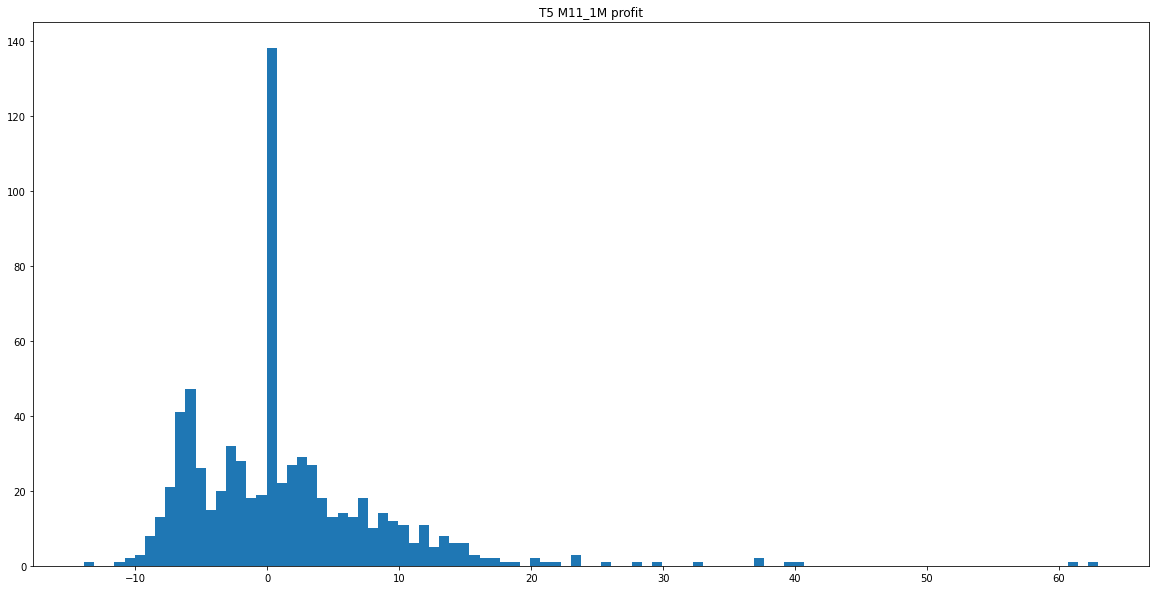

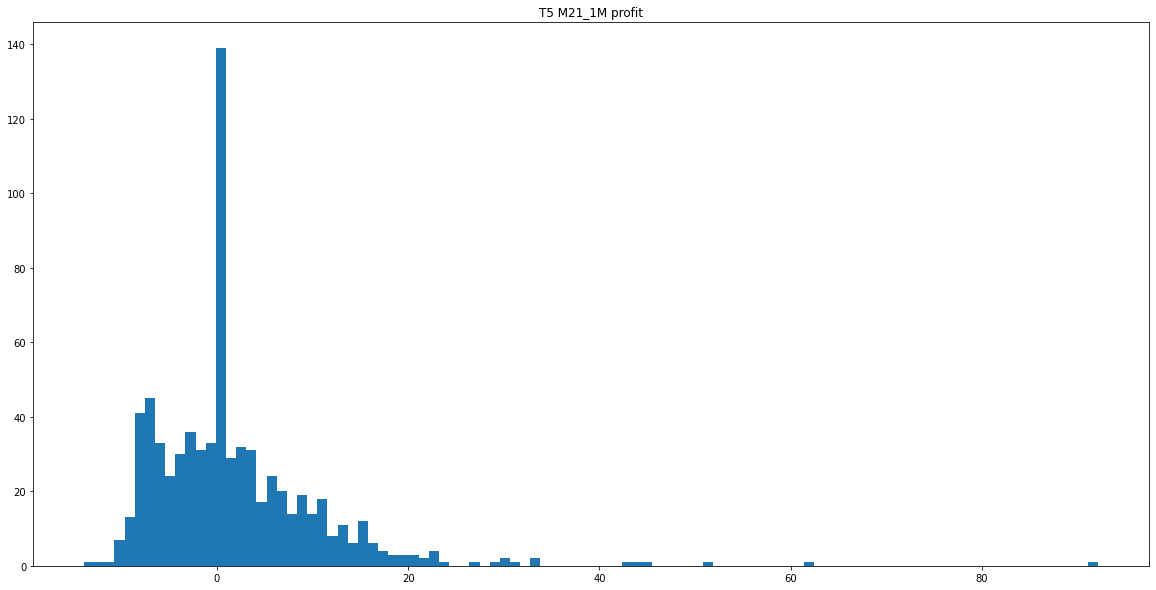

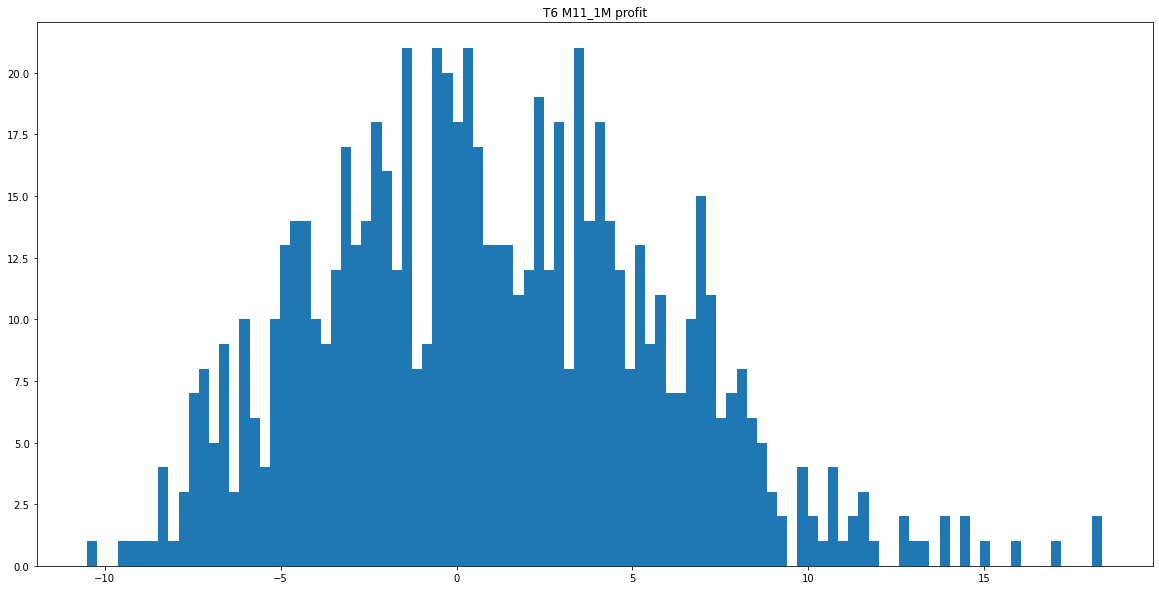

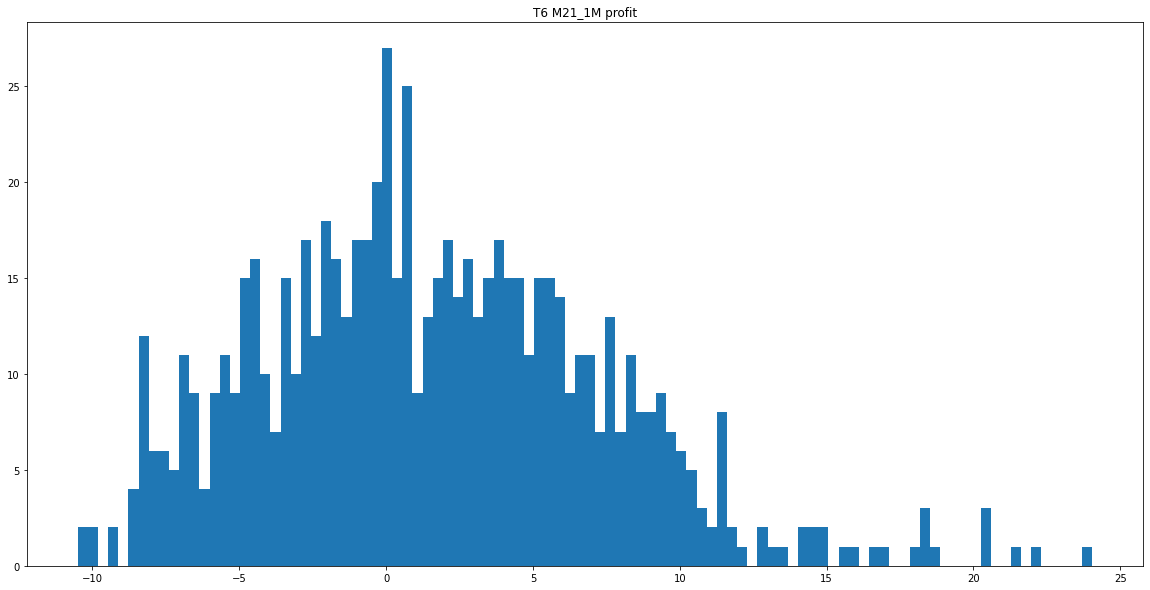

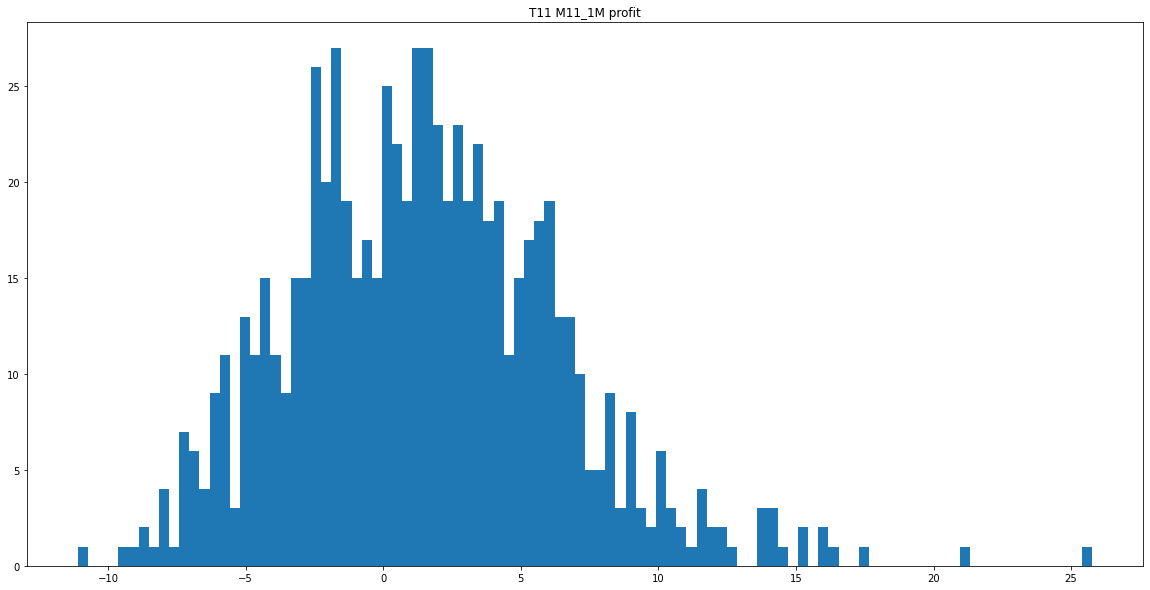

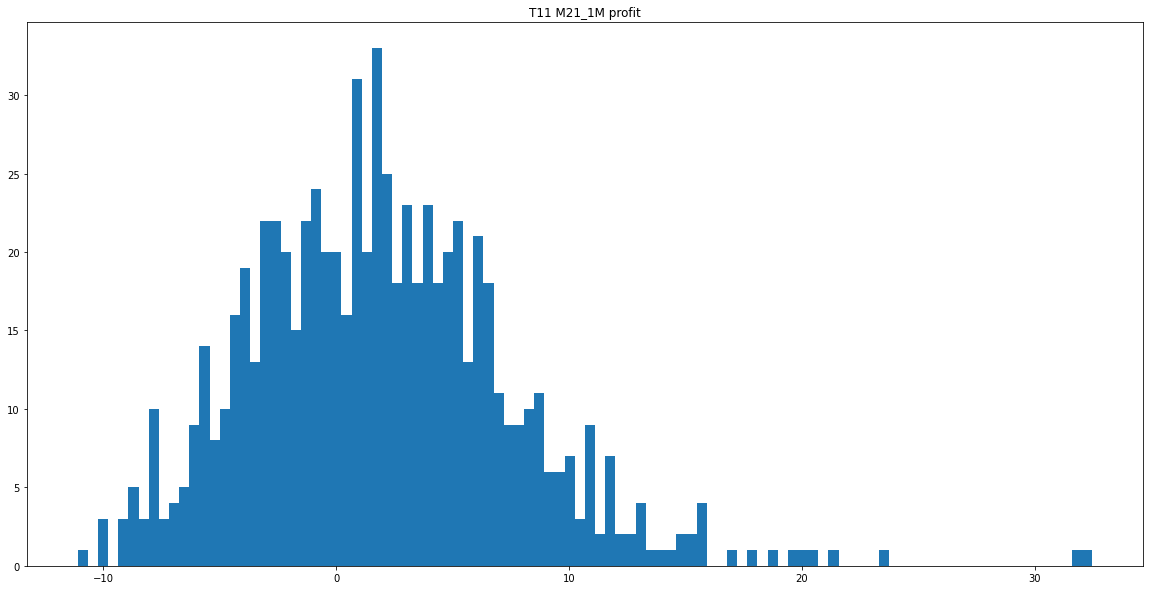

In [19]:
from matplotlib import pyplot as plt
for col in df.columns:
    plt.figure(figsize=(20, 10))
    plt.hist(100*df[col], bins=100)
    plt.title(col)
    plt.show()

## 決策樹分析

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# randon forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
# caculate pearson correlation
from scipy.stats import pearsonr
# caculate Point-Biserial correlation
from scipy.stats import pointbiserialr
correlation = []
# for i in df_profit2.columns:
#     if i != 'T11 1M profit':
#         value, _ = pointbiserialr(df_profit2[i], df_profit2['T11 1M profit'])
#         correlation.append(value)
#         print(i, value)


# a = df_profit2.corr(method='pearson')
# print(a)
# plot correlation
# import seaborn as sns
# plt.figure(figsize=(20, 20))
# sns.heatmap(a, annot=True, cmap='RdYlGn', linewidths=0.2)

X = df_profit2.drop('T11 2W profit', axis=1)
# X = df_profit[['週期', 'TAIEX>10MA']]

y = df_profit2['T11 2W profit']>=1
print(len(y[y==True])/len(y))
# 建立決策樹回歸模型
n = np.random.randint(1, 100)
print(n)
model = DecisionTreeClassifier(max_depth=3, random_state=n)
model2 = DecisionTreeClassifier(max_depth=5, random_state=n)
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 訓練模型
model.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = model.predict(X_test)
print(len(y_pred[y_pred==True])/len(y_pred))
# 計算模型的R平方值
r2_score = model.score(X_test, y_test)
print("R平方值:", r2_score)
y_pred = model.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print("準確率：", accuracy)
node_samples = model.apply(X)

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, X, y, cv=10)
print('CV :', scores)


# 計算每個節點的樣本數量
node_sample_counts = pd.Series(node_samples).value_counts().sort_index()

# print(node_sample_counts)
# 印出決策樹的樹狀圖
tree_rules = export_text(model, feature_names=X.columns.tolist())
# print("決策樹規則：\n", tree_rules)

# 繪製決策樹的樹狀圖
plt.figure(figsize=(50, 40))
plot_tree(model, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.show()

## 產業RS選股數量擬合

In [ ]:
t = np.arange(0, 3, 0.01)
length = len(t)
con = 1
sin = np.sin(2*np.pi*t)+np.random.rand(length)+con+(-1)*(t>2)
sin2 = (np.sin(2*np.pi*(t-0.4))+np.random.rand(length)+con)*(t>0.4)
sin3 = (np.sin(2*np.pi*(t-0.9))+np.random.rand(length)+con)*(t>0.9)
sumvalue = sin+sin2+sin3
# plt.figure(figsize=(20, 10))
# plt.plot(t, sin)
# plt.show()
# plt.figure(figsize=(20, 10))
# plt.plot(t, sin2)
# plt.show()
# plt.figure(figsize=(20, 10))
# plt.plot(t, sin3)
# plt.show()
plt.figure(figsize=(20, 6))
plt.plot(t, sumvalue)
plt.show()
true = '''27.5
29.4
29.4
27.5
27.5
27.5
27.5
29.4
27.5
25.5
27.5
27.5
31.4
33.3
35.3
37.3
37.3
37.3
37.3
35.3
41.2
43.1
43.1
45.1
45.1
47.1
47.1
45.1
47.1
49
47.1
49
51
51
51
49
49
49
49
31.4
47.1
47.1
47.1
45.1
49
49
49
43.1
43.1
43.1
43.1
43.1
45.1
47.1
45.1
45.1
45.1
45.1
45.1
45.1
43.1
45.1
45.1
47.1
45.1
45.1
47.1
47.1
45.1
45.1
45.1
45.1
43.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
45.1
47.1
47.1
45.1
41.2
43.1
43.1
43.1
43.1
45.1
45.1
45.1
45.1
47.1
47.1
51
49
51
51
51
51
51
51
51
52.9
52.9
51
52.9
51
49
49
45.1
45.1
45.1
45.1
43.1
43.1
45.1
45.1
45.1
45.1
43.1
43.1
43.1
43.1
43.1
43.1
43.1
43.1
45.1
45.1
45.1
45.1
47.1
47.1
47.1
51
45.1
45.1
47.1
43.1
45.1
45.1
45.1
43.1
41.2
43.1
41.2
45.1
43.1
41.2
41.2
41.2
37.3
35.3
37.3
37.3
37.3
35.3
37.3
37.3
35.3
37.3
41.2
37.3
37.3
37.3
37.3
33.3
33.3
31.4
31.4
31.4
33.3
31.4
31.4
31.4
31.4
31.4
31.4
31.4
33.3
31.4
33.3
29.4
33.3
31.4
31.4
35.3
35.3
33.3
35.3
33.3
37.3
35.3
33.3
35.3
35.3
35.3
31.4
27.5
29.4
27.5
27.5
25.5
27.5
23.5
23.5
23.5
23.5
23.5
23.5
19.6
21.6
19.6
21.6
19.6
17.6
15.7
15.7
15.7
15.7
17.6
15.7
15.7
15.7
15.7
15.7
15.7
15.7
13.7'''

true2 = '''28.1
31.2
29.7
29.7
29.7
32.8
32.8
34.4
29.7
29.7
29.7
29.7
29.7
28.1
26.6
28.1
26.6
26.6
18.8
21.9
25
25
29.7
29.7
28.1
26.6
23.4
23.4
28.1
28.1
25
20.3
23.4
20.3
21.9
23.4
23.4
23.4
14.1
21.9
21.9
23.4
25
14.1
26.6
25
23.4
23.4
17.2
17.2
17.2
21.9
21.9
18.8
15.6
15.6
15.6
15.6
15.6
15.6
15.6
14.1
14.1
10.9
10.9
10.9
10.9
10.9
10.9
9.4
10.9
9.4'''

true3 = '''25
25
25
25
25
25
25
25
25
25
25
25
25
25
29.2
33.3
33.3
33.3
33.3
29.2
29.2
29.2
25
20.8
20.8
20.8
20.8
20.8
20.8
16.7
20.8
20.8
20.8
16.7
16.7
16.7
16.7
16.7
16.7
16.7
16.7
16.7
16.7
12.5
12.5
12.5
12.5
8.3
8.3
12.5
12.5
16.7
16.7
20.8
20.8
20.8
20.8
20.8
20.8
16.7
16.7
16.7
16.7
12.5
12.5
8.3
8.3
4.2'''

true4 = '''23.1
24.6
24.6
21.5
24.6
26.2
26.2
27.7
27.7
27.7
26.2
26.2
27.7
27.7
27.7
26.2
27.7
30.8
33.8
33.8
33.8
29.2
30.8
32.3
29.2
29.2
27.7
30.8
30.8
32.3
35.4
35.4
33.8
35.4
36.9
40
35.4
38.5
36.9
36.9
41.5
40
40
40
41.5
41.5
43.1
43.1
44.6
43.1
44.6
41.5
40
41.5
41.5
43.1
44.6
40
38.5
35.4
35.4
35.4
35.4
35.4
38.5
36.9
41.5
43.1
44.6
43.1
43.1
43.1
43.1
41.5
40
41.5
38.5
36.9
33.8
35.4
35.4
36.9
40
35.4
36.9
40
36.9
40
40
40
41.5
40
38.5
36.9
40
41.5
40
40
41.5
43.1
43.1
41.5
38.5
33.8
35.4
35.4
35.4
35.4
35.4
33.8
32.3
33.8
35.4
35.4
35.4
35.4
35.4
32.3
33.8
33.8
33.8
30.8
26.2
29.2
27.7
26.2
32.3
32.3
32.3
32.3
30.8
29.2
30.8
32.3
27.7
30.8
29.2
27.7
26.2
26.2
23.1
23.1
24.6
23.1
18.5
18.5
21.5
20
18.5
18.5
16.9
16.9
16.9
16.9
18.5
21.5
20
20
18.5
16.9
16.9
16.9
18.5
13.8'''

true5 = '''26.2
26.2
26.2
26.2
26.2
26.2
32.3
32.3
24.6
26.2
26.2
26.2
26.2
26.2
24.6
24.6
23.1
24.6
30.8
32.3
30.8
27.7
32.3
30.8
30.8
29.2
30.8
32.3
32.3
32.3
32.3
30.8
35.4
30.8
33.8
32.3
32.3
29.2
27.7
29.2
27.7
30.8
29.2
21.5
30.8
30.8
32.3
18.5
21.5
24.6
23.1
24.6
24.6
26.2
27.7
27.7
30.8
32.3
32.3
32.3
33.8
30.8
30.8
29.2
29.2
29.2
30.8
29.2
29.2
21.5
23.1
21.5
26.2
26.2
23.1
26.2
26.2
23.1
21.5
21.5
26.2
26.2
24.6
24.6
26.2
24.6
27.7
18.5
26.2
26.2
26.2
26.2
21.5
23.1
23.1
24.6
26.2
26.2
26.2
24.6
21.5
21.5
23.1
26.2
26.2
27.7
27.7
27.7
29.2
26.2
29.2
29.2
32.3
30.8
30.8
32.3
32.3
33.8
32.3
32.3
29.2
29.2
30.8
29.2
29.2
30.8
30.8
32.3
32.3
32.3
32.3
32.3
33.8
35.4
35.4
32.3
32.3
32.3
32.3
32.3
35.4
33.8
32.3
30.8
30.8
30.8
32.3
27.7
24.6
26.2
26.2
26.2
26.2
26.2
26.2
27.7
27.7
27.7
29.2
27.7
27.7
23.1
24.6
23.1
24.6
23.1
23.1
23.1
24.6
23.1
26.2
24.6
26.2
24.6
24.6
26.2
24.6
23.1
23.1
27.7
27.7
24.6
24.6
23.1
24.6
23.1
24.6
24.6
21.5
24.6
26.2
26.2
27.7
27.7
27.7
26.2
26.2
27.7
27.7
27.7
26.2
27.7
30.8
33.8
33.8
33.8
29.2
30.8
32.3
29.2
29.2
27.7
30.8
30.8
32.3
35.4
35.4
33.8
35.4
36.9
40
35.4
38.5
36.9
36.9
41.5
40
40
40
41.5
41.5
43.1
43.1
44.6
43.1
44.6
41.5
40
41.5
41.5
43.1
44.6
40
38.5
35.4
35.4
35.4
35.4
35.4
38.5
36.9
41.5
43.1
44.6
43.1
43.1
43.1
43.1
41.5
40
41.5
38.5
36.9
33.8
35.4
35.4
36.9
40
35.4
36.9
40
36.9
40
40
40
41.5
41.5
41.5
40
40
40
38.5
38.5
36.9
36.9
40
40
41.5
41.5
40
40
40
40
41.5
41.5
43.1
43.1
43.1
43.1
41.5
41.5
38.5
38.5
33.8
33.8
35.4
35.4
35.4
35.4
35.4
35.4
35.4
35.4
35.4
35.4
33.8
33.8
32.3
32.3
33.8
33.8
35.4
35.4
35.4
35.4
35.4
35.4
35.4
35.4
35.4
35.4
32.3
32.3
33.8
33.8
33.8
33.8
33.8
33.8
30.8
30.8
26.2
26.2
29.2
29.2
27.7
27.7
26.2
26.2
32.3
32.3
32.3
32.3
32.3
32.3
32.3
32.3
30.8
30.8
29.2
29.2
30.8
30.8
32.3
32.3
27.7
27.7
30.8
30.8
29.2
29.2
27.7
27.7
26.2
26.2
26.2
26.2
23.1
23.1
24.6
23.1
18.5
18.5
21.5
20
18.5
18.5
16.9
16.9
16.9
16.9
18.5
21.5
20
20
18.5
16.9
16.9
16.9
18.5
13.8'''

true6 = '''14.7
20.6
17.6
17.6
20.6
17.6
17.6
23.5
17.6
23.5
29.4
26.5
26.5
29.4
32.4
32.4
32.4
32.4
32.4
32.4
32.4
32.4
32.4
32.4
32.4
26.5
32.4
32.4
32.4
26.5
26.5
26.5
26.5
26.5
26.5
26.5
26.5
26.5
26.5
29.4
32.4
29.4
29.4
29.4
26.5
32.4
32.4
32.4
38.2
32.4
32.4
32.4
35.3
29.4
32.4
32.4
35.3
35.3
35.3
38.2
32.4
35.3
32.4
32.4
32.4
29.4
29.4
29.4
32.4
29.4
29.4
26.5
26.5
32.4
32.4
32.4
32.4
35.3
35.3
35.3
29.4
26.5
32.4
32.4
35.3
35.3
35.3
35.3
35.3
35.3
32.4
32.4
35.3
35.3
35.3
35.3
35.3
35.3
44.1
41.2
41.2
38.2
38.2
35.3
35.3
32.4
32.4
32.4
32.4
32.4
38.2
38.2
35.3
41.2
38.2
38.2
38.2
35.3
35.3
32.4
32.4
35.3
32.4
32.4
32.4
29.4
29.4
29.4
29.4
32.4
32.4
32.4
32.4
32.4
32.4
32.4
29.4
29.4
32.4
29.4
29.4
29.4
29.4
29.4
32.4
29.4
32.4
38.2
41.2
38.2
38.2
35.3
32.4
29.4
32.4
29.4
29.4
32.4
29.4
32.4
32.4
32.4
29.4
32.4
32.4
29.4
29.4
29.4
29.4
26.5
29.4
29.4
29.4
26.5
26.5
23.5
23.5
23.5
23.5
23.5
20.6
23.5
23.5
26.5
26.5
26.5
26.5
29.4
26.5
26.5
20.6
23.5
23.5
23.5
26.5
20.6
20.6
20.6
23.5
26.5
26.5
26.5
20.6
20.6
23.5
20.6
23.5
23.5
29.4
29.4
29.4
32.4
32.4
29.4
32.4
32.4
35.3
26.5
23.5
26.5
23.5
26.5
23.5
29.4
29.4
29.4
29.4
29.4
32.4
29.4
26.5
32.4
26.5
23.5
26.5
29.4
23.5
26.5
26.5
26.5
26.5
26.5
23.5
26.5
20.6
26.5
26.5
23.5
26.5
29.4
23.5
23.5
29.4
29.4
29.4
26.5
26.5
29.4
29.4
32.4
26.5
23.5
23.5
23.5
26.5
23.5
23.5
23.5
26.5
29.4
26.5
32.4
32.4
32.4
26.5
29.4
32.4
29.4
26.5
26.5
26.5
26.5
26.5
32.4
32.4
32.4
35.3
35.3
35.3
35.3
32.4
32.4
35.3
35.3
35.3
32.4
32.4
29.4
29.4
29.4
29.4
29.4
29.4
29.4
26.5
26.5
26.5
26.5
26.5
32.4
32.4
29.4
29.4
29.4
29.4
29.4
26.5
26.5
26.5
26.5
29.4
29.4
26.5
23.5
20.6
20.6
23.5
23.5
20.6
20.6
23.5
20.6
20.6
23.5
23.5
20.6
23.5
20.6
20.6
20.6
17.6
20.6
17.6
17.6
23.5
23.5
23.5
20.6
20.6
17.6
17.6
17.6
17.6
17.6
17.6
14.7
14.7
14.7
14.7
14.7
14.7
14.7
14.7
14.7
14.7
14.7
11.8
11.8
14.7
8.8'''

s7 = '''39
41.6
44.2
42.9
44.2
42.9
45.5
44.2
37.7
40.3
36.4
37.7
40.3
40.3
39
40.3
37.7
42.9
41.6
41.6
45.5
45.5
45.5
45.5
44.2
44.2
44.2
42.9
42.9
44.2
44.2
44.2
44.2
40.3
45.5
45.5
45.5
48.1
41.6
48.1
40.3
46.8
48.1
33.8
46.8
45.5
45.5
35.1
48.1
46.8
49.4
53.2
53.2
54.5
48.1
50.6
53.2
53.2
53.2
51.9
48.1
44.2
42.9
44.2
44.2
44.2
44.2
44.2
44.2
42.9
44.2
41.6
41.6
44.2
41.6
41.6
41.6
41.6
39
41.6
40.3
40.3
37.7
39
39
37.7
40.3
36.4
37.7
37.7
36.4
36.4
36.4
35.1
35.1
35.1
32.5
33.8
33.8
32.5
32.5
29.9
33.8
32.5
31.2
31.2
31.2
31.2
31.2
32.5
32.5
29.9
31.2
29.9
32.5
31.2
29.9
29.9
29.9
29.9
29.9
32.5
33.8
35.1
35.1
33.8
35.1
35.1
35.1
32.5
32.5
32.5
32.5
32.5
32.5
31.2
32.5
33.8
32.5
32.5
33.8
33.8
31.2
31.2
29.9
29.9
28.6
29.9
29.9
29.9
29.9
28.6
29.9
28.6
27.3
27.3
26
26
26
26
27.3
26
26
26
24.7
26
26
26
26
26
24.7
26
26
26
26
26
24.7
26
26
26
26
26
26
26
27.3
27.3
26
26
24.7
24.7
26
26
27.3
26
26
26
27.3
28.6
28.6
28.6
27.3
27.3
27.3
27.3
27.3
27.3
28.6
27.3
27.3
27.3
28.6
28.6
28.6
28.6
28.6
28.6
27.3
28.6
29.9
31.2
29.9
29.9
29.9
27.3
29.9
28.6
26
29.9
28.6
28.6
28.6
27.3
27.3
29.9
28.6
27.3
27.3
27.3
27.3
28.6
31.2
31.2
31.2
29.9
29.9
31.2
29.9
28.6
31.2
29.9
31.2
29.9
29.9
29.9
26
27.3
27.3
27.3
28.6
27.3
28.6
28.6
26
29.9
28.6
29.9
29.9
31.2
29.9
29.9
29.9
28.6
28.6
29.9
29.9
29.9
29.9
28.6
27.3
26
28.6
28.6
28.6
27.3
27.3
26
24.7
27.3
27.3
28.6
31.2
29.9
27.3
28.6
27.3
28.6
28.6
28.6
28.6
28.6
26
27.3
27.3
28.6
28.6
27.3
27.3
26
24.7
24.7
26
24.7
23.4
23.4
22.1
20.8
19.5
19.5
19.5
22.1
20.8
19.5
20.8
22.1
22.1
20.8
18.2
18.2
18.2
18.2
16.9
15.6
16.9
16.9
15.6
16.9
18.2
16.9
16.9
16.9
15.6'''

s8 = '''37.5
31.2
31.2
37.5
37.5
37.5
37.5
37.5
31.2
18.8
25
18.8
25
25
25
25
25
25
25
37.5
37.5
37.5
37.5
37.5
31.2
31.2
25
37.5
37.5
31.2
31.2
37.5
37.5
37.5
37.5
37.5
37.5
37.5
37.5
37.5
37.5
37.5
37.5
37.5
25
25
18.8
12.5
25
12.5
12.5
18.8
18.8
12.5
12.5
12.5
12.5
12.5
12.5
6.2'''

s9 = '''36.3
34.1
36.3
31.9
33
34.1
36.3
30.8
29.7
28.6
26.4
26.4
28.6
28.6
28.6
27.5
29.7
30.8
29.7
31.9
27.5
28.6
29.7
29.7
27.5
26.4
27.5
27.5
24.2
20.9
24.2
23.1
23.1
22
22
15.4
18.7
18.7
18.7
17.6
9.9
17.6
14.3
19.8
17.6
9.9
19.8
18.7
18.7
14.3
15.4
16.5
17.6
15.4
17.6
15.4
16.5
16.5
18.7
17.6
14.3
15.4
14.3
12.1
12.1
11
11
11
12.1
11
11
13.2
12.1
9.9'''


true = true.split('\n')
true = [float(i) for i in true]
true2 = true2.split('\n')
true2 = [float(i) for i in true2]
true3 = true3.split('\n')
true3 = [float(i) for i in true3]
true4 = true4.split('\n')
true4 = [float(i) for i in true4]
true5 = true5.split('\n')
true5 = [float(i) for i in true5]
true6 = true6.split('\n')
true6 = [float(i) for i in true6]
s7 = s7.split('\n')
s7 = [float(i) for i in s7]
s8 = s8.split('\n')
s8 = [float(i) for i in s8]
s9 = s9.split('\n')
s9 = [float(i) for i in s9]
print(len(true))

plt.figure(figsize=(20, 6))
plt.plot(s9[::-1])
plt.show()


plt.figure(figsize=(20, 6))
plt.plot(s8[::-1])
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(s7[::-1])
plt.show()


plt.figure(figsize=(20, 6))
plt.plot(true6[::-1])
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(true[::-1])
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(true2[::-1])
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(true3[::-1])
plt.show()
